In [ ]:
# Importing important packages
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# Import Keras specific packages
from tensorflow import keras
from keras.models import Model
from keras import layers
from keras.layers import Dropout, Dense, Flatten, BatchNormalization, GlobalAveragePooling2D
from keras.models import Sequential
from keras.applications.inception_v3 import InceptionV3
#from keras.applications import EfficientNetB4
from keras.preprocessing.image import ImageDataGenerator
from keras.models import load_model
from keras.preprocessing import image
from collections import Counter
import os

In [ ]:
# https://drive.google.com/file/d/1p6_6Wbb2Pjp8PsuZUNtl1eioYCRMQnJH/view?usp=drive_link

In [ ]:
!gdown --id 1p6_6Wbb2Pjp8PsuZUNtl1eioYCRMQnJH

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1p6_6Wbb2Pjp8PsuZUNtl1eioYCRMQnJH
To: /content/tf_lite_model_yang32.tflite
100% 31.7M/31.7M [00:00<00:00, 46.3MB/s]


In [ ]:
# https://drive.google.com/file/d/11dV_I6SmvHZ63Ts-2sWTYLWCDZpt5XGn/view?usp=drive_link

In [ ]:
!gdown --id 11dV_I6SmvHZ63Ts-2sWTYLWCDZpt5XGn

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=11dV_I6SmvHZ63Ts-2sWTYLWCDZpt5XGn
To: /content/Zebra.jpg
100% 1.90M/1.90M [00:00<00:00, 14.7MB/s]


In [ ]:
# https://drive.google.com/file/d/14x2IPwYFWDTtlAkc4Ls0FOTPpho9lPoQ/view?usp=drive_link

In [ ]:
!gdown --id 14x2IPwYFWDTtlAkc4Ls0FOTPpho9lPoQ

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=14x2IPwYFWDTtlAkc4Ls0FOTPpho9lPoQ
To: /content/class_labels.npy
100% 1.65k/1.65k [00:00<00:00, 6.68MB/s]


In [ ]:
#https://drive.google.com/file/d/1KvVyg5-EByg6GFPqef17nXdzDzaiBxyR/view?usp=drive_link

In [ ]:
!gdown --id 1KvVyg5-EByg6GFPqef17nXdzDzaiBxyR

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1KvVyg5-EByg6GFPqef17nXdzDzaiBxyR
To: /content/Segawon.jpg
100% 61.5k/61.5k [00:00<00:00, 3.70MB/s]


In [ ]:
#https://drive.google.com/file/d/1-4mUGEKOA8zCNLPvCpg9qq4xha_d2b8u/view?usp=drive_link

In [ ]:
!gdown --id 1-4mUGEKOA8zCNLPvCpg9qq4xha_d2b8u

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1-4mUGEKOA8zCNLPvCpg9qq4xha_d2b8u
To: /content/Koceengggg.jpg
100% 25.1k/25.1k [00:00<00:00, 57.2MB/s]


In [ ]:
https://drive.google.com/file/d/1zhB6djxqyW4QdbNL2PMlKYRGCi3TqorR/view?usp=drive_link

In [ ]:
!gdown --id 1zhB6djxqyW4QdbNL2PMlKYRGCi3TqorR

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1zhB6djxqyW4QdbNL2PMlKYRGCi3TqorR
To: /content/tflite_model_mix.tflite
100% 15.9M/15.9M [00:00<00:00, 32.7MB/s]


In [ ]:
TF_LITE_MODEL_FILE_NAME = "/content/tflite_model_mix.tflite"


In [ ]:
interpreter = tf.lite.Interpreter(model_path = TF_LITE_MODEL_FILE_NAME)
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()
print("Input Shape:", input_details[0]['shape'])
print("Input Type:", input_details[0]['dtype'])
print("Output Shape:", output_details[0]['shape'])
print("Output Type:", output_details[0]['dtype'])


Input Shape: [  1 240 240   3]
Input Type: <class 'numpy.float32'>
Output Shape: [ 1 90]
Output Type: <class 'numpy.float32'>


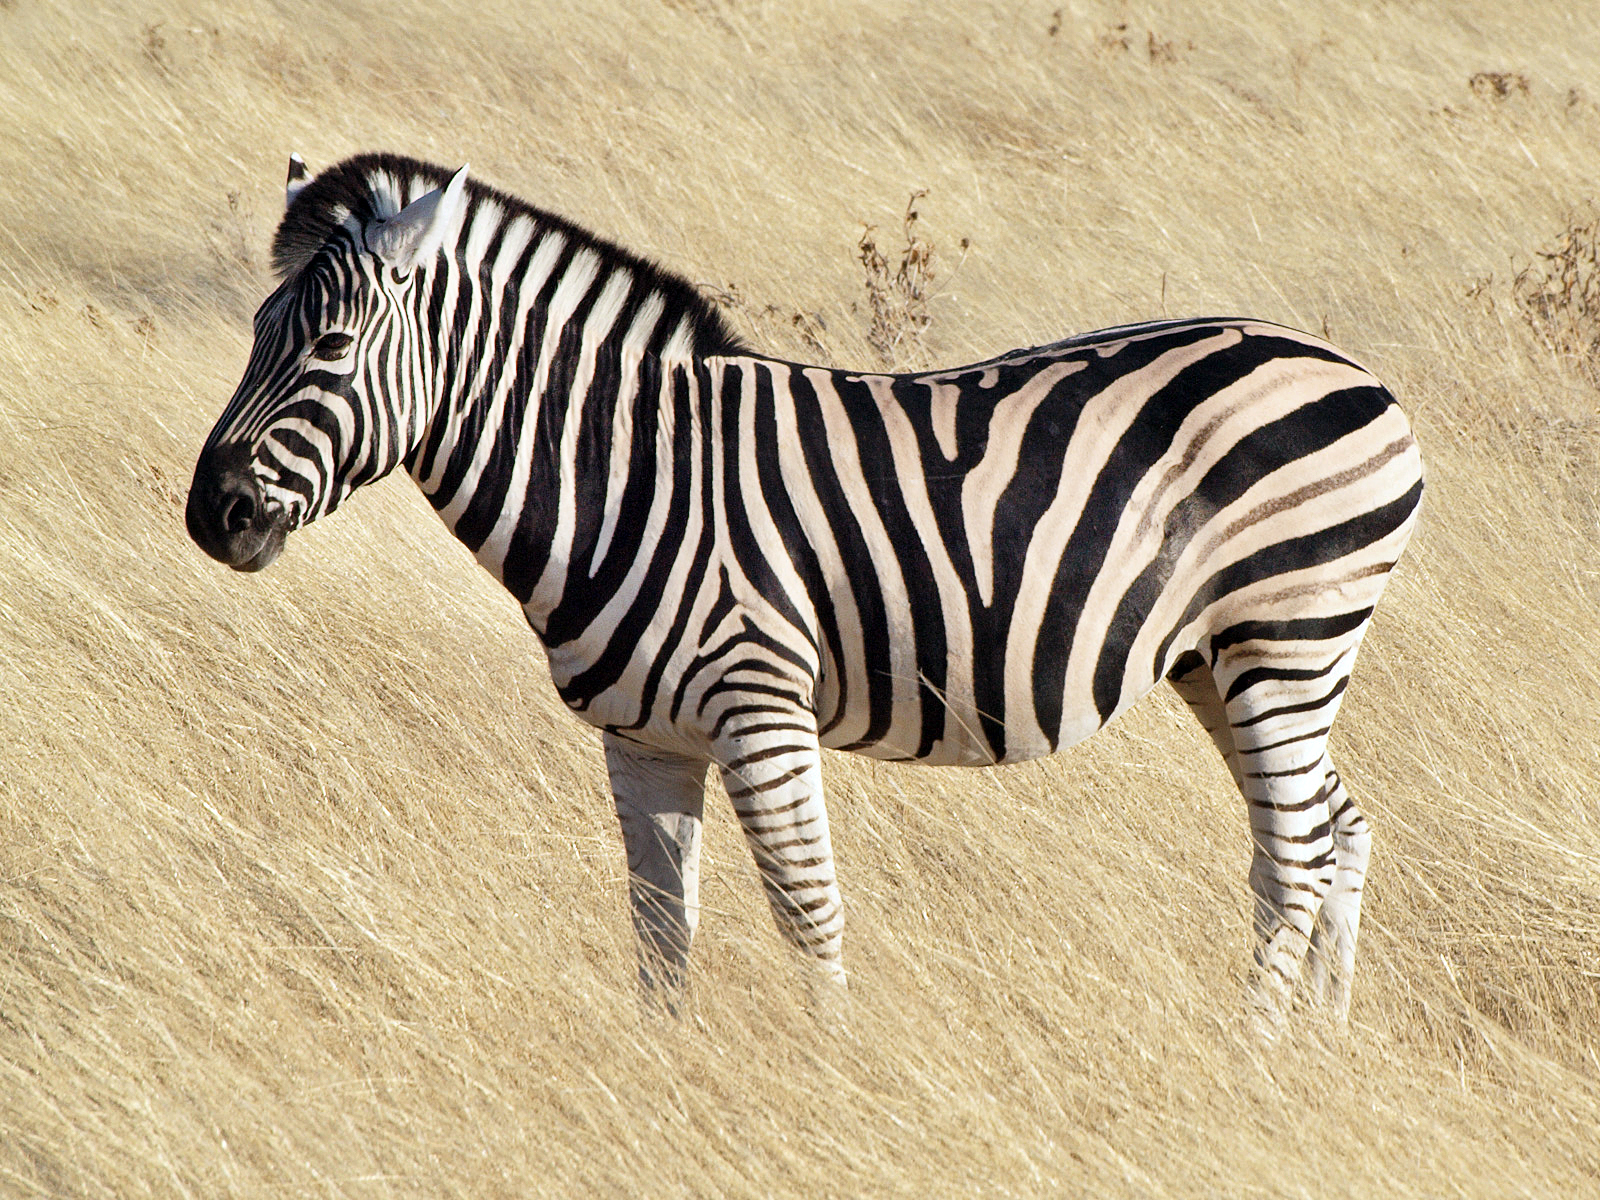

In [ ]:
from google.colab.patches import cv2_imshow
import cv2

img_path = '/content/Zebra.jpg'
im = cv2.imread(img_path)

cv2_imshow(im)

In [ ]:
img_path = '/content/Zebra.jpg'
im = image.load_img(img_path, target_size=(240, 240))
im = image.img_to_array(im)
im = im.reshape(1,240,240,3)

In [ ]:
interpreter.allocate_tensors()
interpreter.set_tensor(input_details[0]['index'], im)
interpreter.invoke()
single_pred = interpreter.get_tensor(output_details[0]['index'])
single_pred = np.squeeze(single_pred)


In [ ]:
if os.path.isfile('class_labels.npy'):
    class_indices = np.load('class_labels.npy', allow_pickle=True).item()
print(class_indices)


{'antelope': 0, 'badger': 1, 'bat': 2, 'bear': 3, 'bee': 4, 'beetle': 5, 'bison': 6, 'boar': 7, 'butterfly': 8, 'cat': 9, 'caterpillar': 10, 'chimpanzee': 11, 'cockroach': 12, 'cow': 13, 'coyote': 14, 'crab': 15, 'crow': 16, 'deer': 17, 'dog': 18, 'dolphin': 19, 'donkey': 20, 'dragonfly': 21, 'duck': 22, 'eagle': 23, 'elephant': 24, 'flamingo': 25, 'fly': 26, 'fox': 27, 'goat': 28, 'goldfish': 29, 'goose': 30, 'gorilla': 31, 'grasshopper': 32, 'hamster': 33, 'hare': 34, 'hedgehog': 35, 'hippopotamus': 36, 'hornbill': 37, 'horse': 38, 'hummingbird': 39, 'hyena': 40, 'jellyfish': 41, 'kangaroo': 42, 'koala': 43, 'ladybugs': 44, 'leopard': 45, 'lion': 46, 'lizard': 47, 'lobster': 48, 'mosquito': 49, 'moth': 50, 'mouse': 51, 'octopus': 52, 'okapi': 53, 'orangutan': 54, 'otter': 55, 'owl': 56, 'ox': 57, 'oyster': 58, 'panda': 59, 'parrot': 60, 'pelecaniformes': 61, 'penguin': 62, 'pig': 63, 'pigeon': 64, 'porcupine': 65, 'possum': 66, 'raccoon': 67, 'rat': 68, 'reindeer': 69, 'rhinoceros': 

Predictions for tf_lite_model_float16.tflite - float16

In [ ]:
results_dict = dict(zip(class_indices.keys(), single_pred))
result = max(results_dict, key=results_dict.get)
print(result)

top3_list = sorted(results_dict, key=results_dict.get, reverse=True)[:3]
print(top3_list)

top3 = dict(Counter(results_dict).most_common(3))
print(top3)

for key, value in top3.items():
    top3.update({key: str(round(value*100, 2))+'%'})
print(top3)

zebra
['zebra', 'okapi', 'caterpillar']
{'zebra': 0.99651235, 'okapi': 0.0030967065, 'caterpillar': 6.0010352e-05}
{'zebra': '99.65%', 'okapi': '0.31%', 'caterpillar': '0.01%'}
